In [1]:
#Tarvittavien kirjastojen tuominen.
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#Datan tuominen.
df=pd.read_excel('http://taanila.fi/wine.xlsx')
df.tail(5)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [12]:
#Muuttujien koodinimien muuttaminen ymmärrettäviksi.
df.columns = ['Y', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline ']
df.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


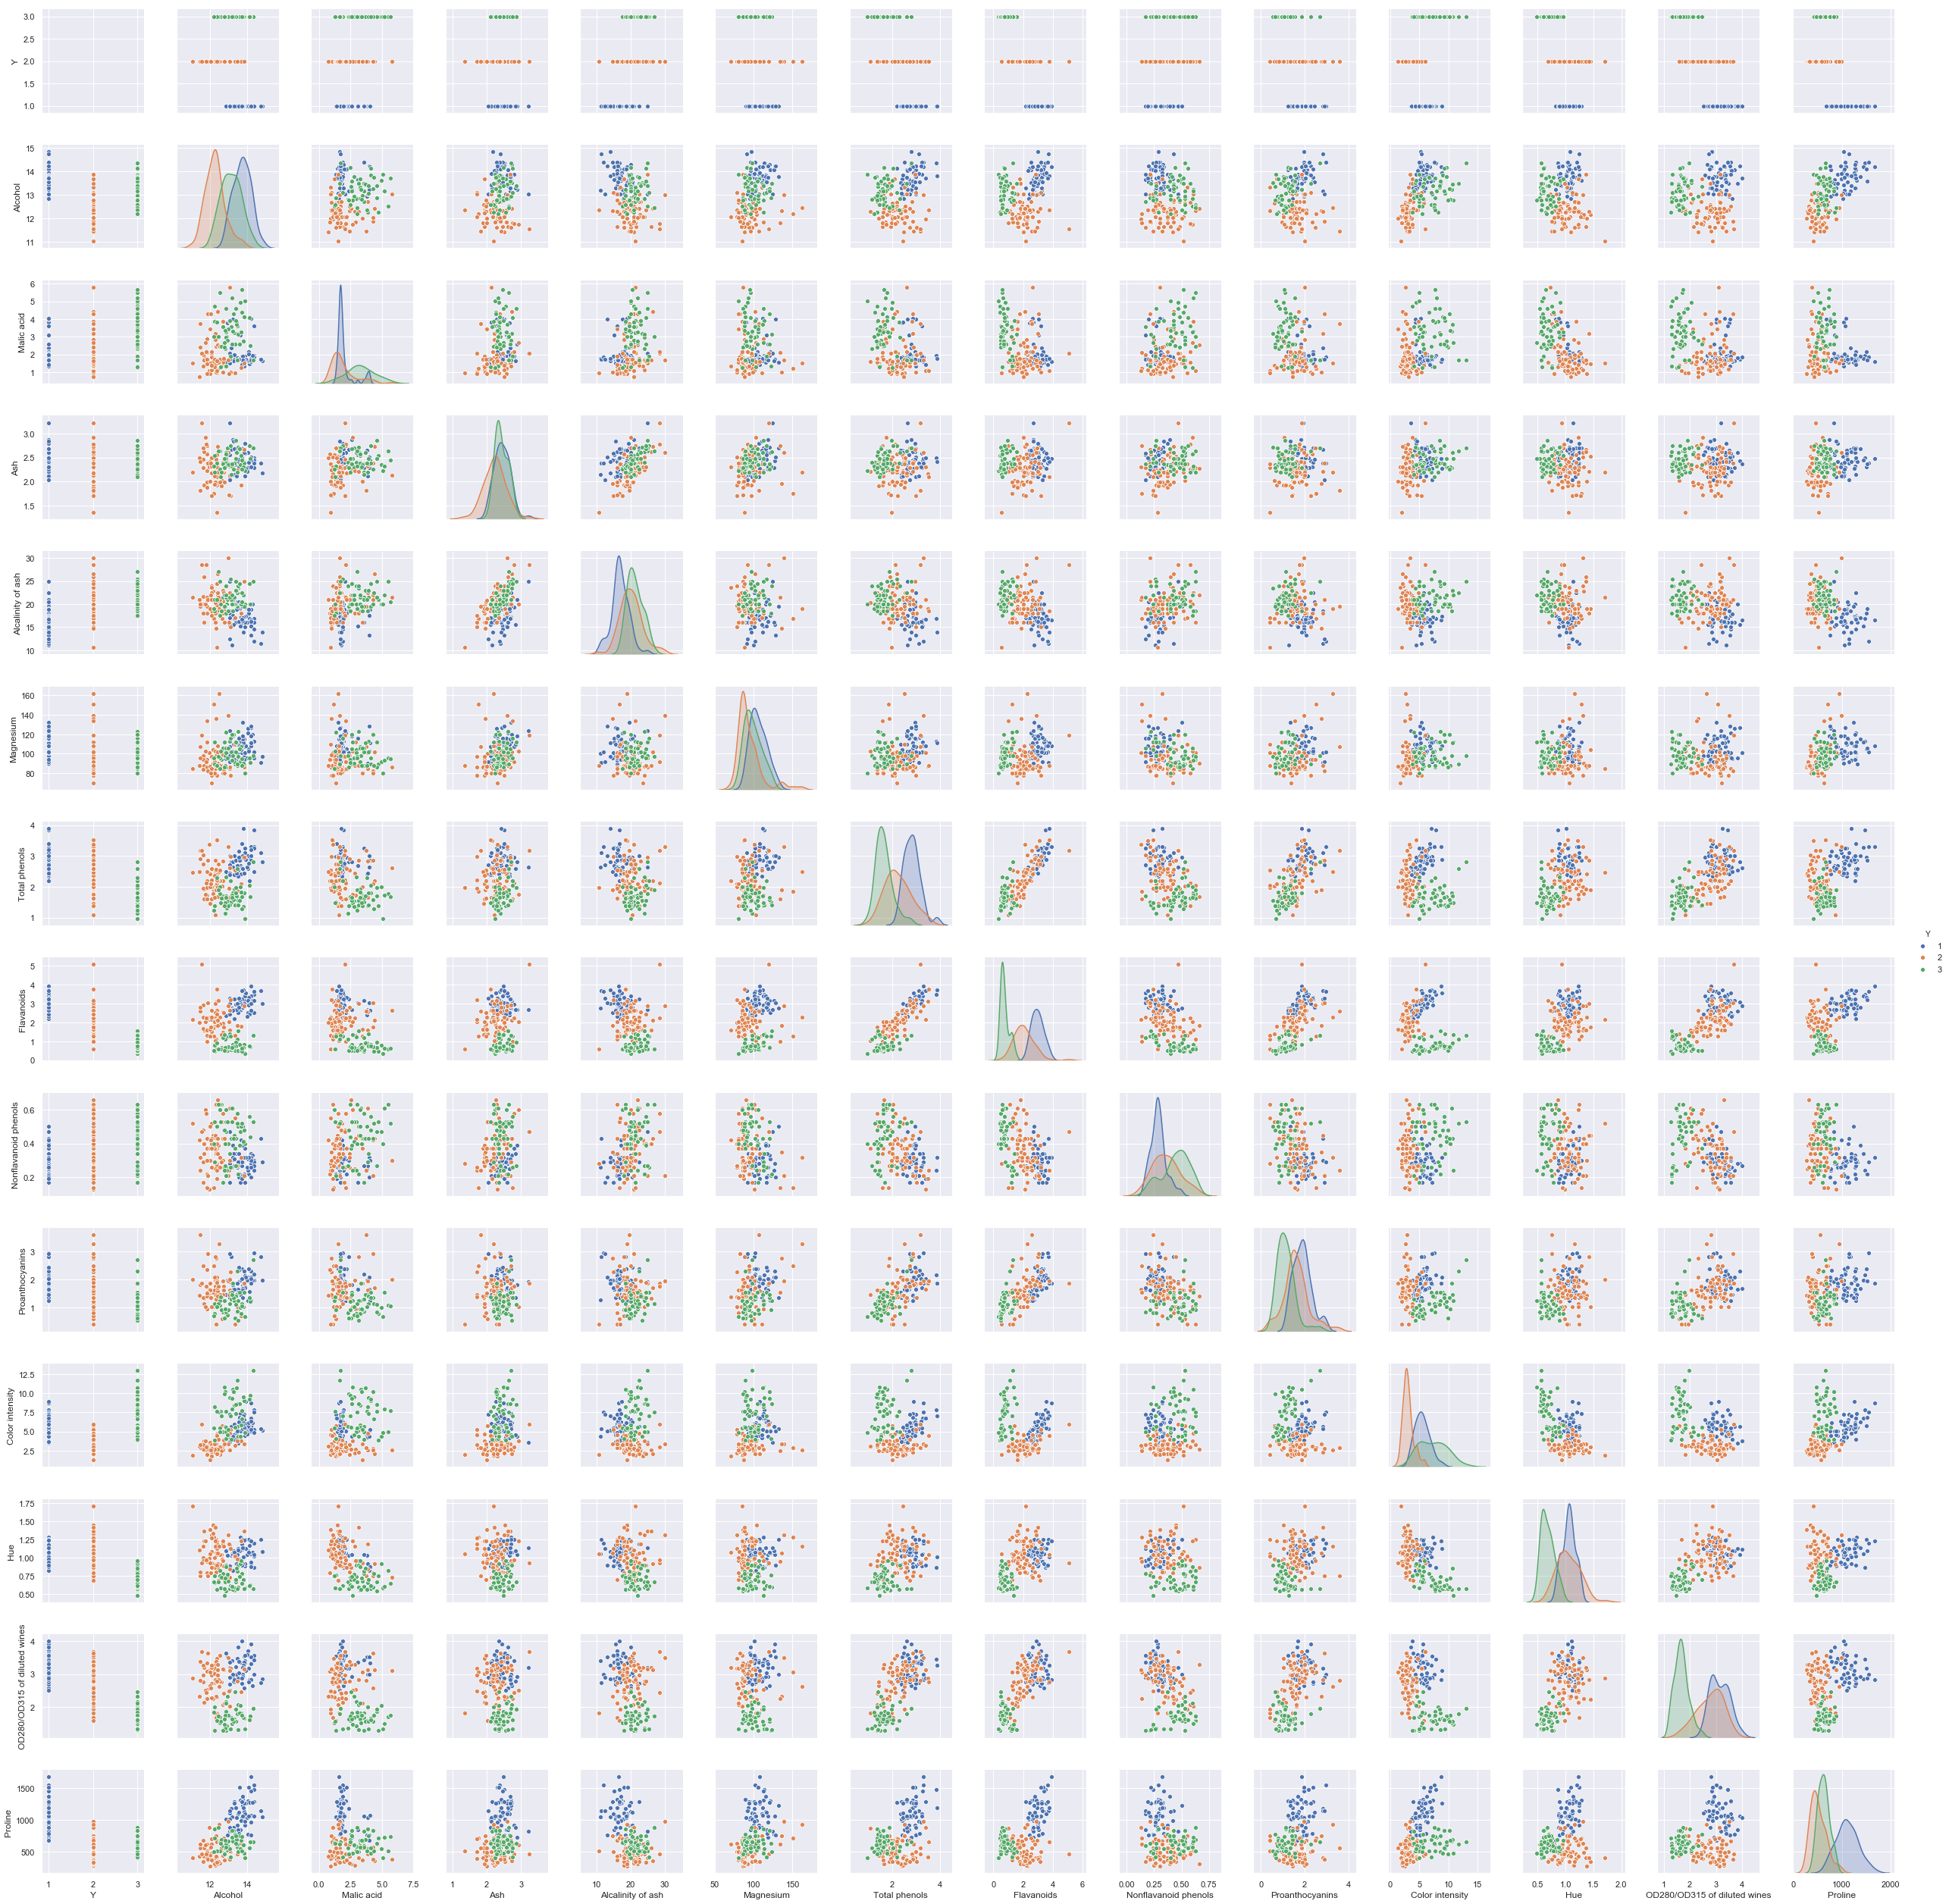

In [4]:
#Viiniluokkien riippuvuus eri ainesosista.
sns.pairplot(df, hue='Y')

In [5]:
#Datan jakaminen opetusdataan ja testidataan.
X = df.drop('Y', axis=1)
y = df['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=3)

In [6]:
#Päätöspuumallin tuominen ja sen maksimisyvyyden määrittäminen.
from sklearn import tree
malli = tree.DecisionTreeClassifier(max_depth=5)
malli.fit(X_train, y_train)
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [7]:
#Ennusteet, jotka ovat osuneet oikeaan opetusdatassa.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_malli))

1.0


In [8]:
#Ennusteet, jotka ovat osuneet oikeean testidatassa.
print(accuracy_score(y_test, y_test_malli))

0.8666666666666667


In [9]:
#Confusion -matriisi opetusdatalle.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_malli))

[[41  0  0]
 [ 0 53  0]
 [ 0  0 39]]


In [10]:
#Confusion -matriisi testidatalle.
print(confusion_matrix(y_test, y_test_malli))

[[15  3  0]
 [ 1 16  1]
 [ 0  1  8]]


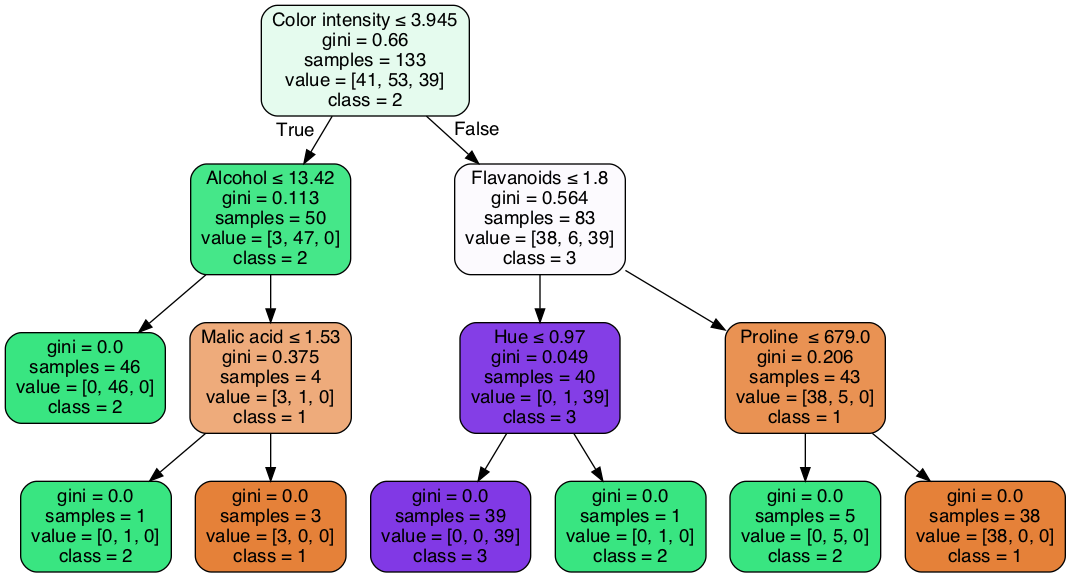

In [11]:
#Päätöspuu, jossa näkyy päätymiset viiniluokkiin 1, 2 ja 3.
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(malli, out_file=None, feature_names=X.columns, class_names=['1', '2', '3'], filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())